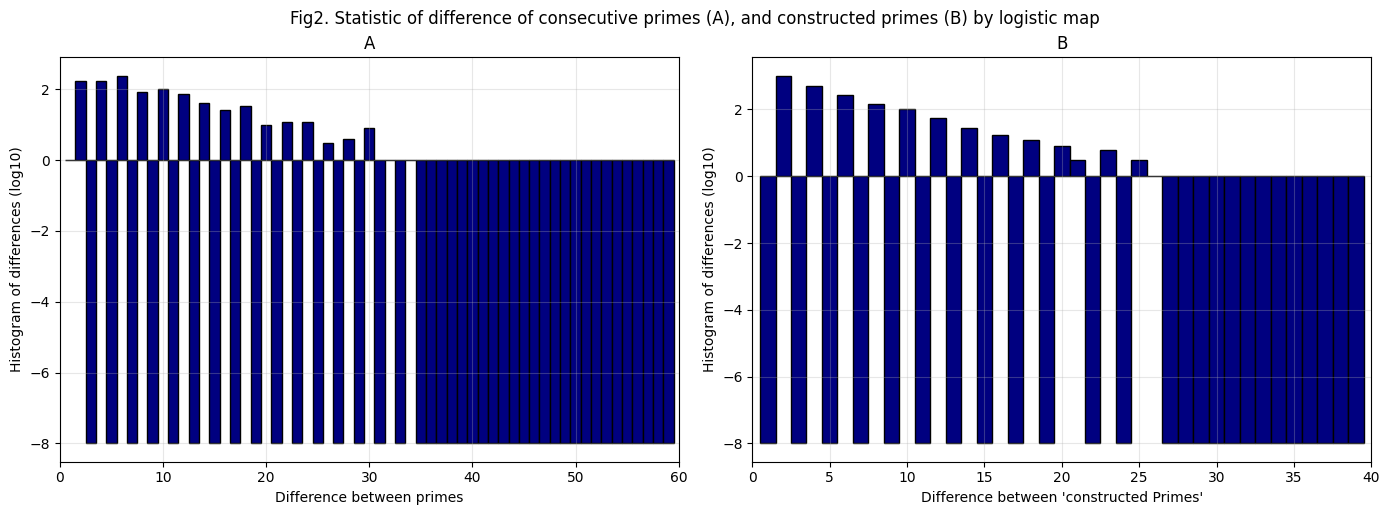

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import primerange  # 用于生成素数

# ==============================
# Step 1: 获取真实素数并计算其差值
# ==============================
def get_prime_gaps(n_primes=15_000_000):
    """获取前 n_primes 个素数，并返回它们之间的差值"""
    primes = list(primerange(2, 10000))[:n_primes]
    gaps = np.diff(primes)
    return gaps

# ==============================
# Step 2: Logistic 映射生成混沌轨道，构造“伪素数”
# ==============================
def logistic_map(x, u):
    return 1 - u * x**2

def generate_constructed_prime_gaps(u=1.543689012692076, num_points=15_000_000, transient=1000):
    """
    生成 Logistic 映射的混沌轨道，基于符号动力学构建“伪素数”序列
    并返回相邻 L 点之间的间距（模拟素数间隙）
    """
    x = 0.5  # 初始值
    symbols = []  # 存储 L 或 R

    # 烧掉暂态
    for _ in range(transient):
        x = logistic_map(x, u)

    # 生成符号序列
    for _ in range(num_points):
        x = logistic_map(x, u)
        if x < 0:
            symbols.append('L')  # 素数区域
        else:
            symbols.append('R')  # 合数区域

    # 提取连续 L 之间的间隔（即“伪素数”之间的差距）
    L_positions = [i for i, s in enumerate(symbols) if s == 'L']
    constructed_gaps = []
    for i in range(1, len(L_positions)):
        gap = L_positions[i] - L_positions[i-1]
        constructed_gaps.append(gap)

    return constructed_gaps

# ==============================
# Step 3: 绘制直方图（log scale）
# ==============================
# 获取数据
real_gaps = get_prime_gaps()
constructed_gaps = generate_constructed_prime_gaps()

# 设置 bin 边界（例如从 1 到 60 或 40）
bins_real = np.arange(1, 61)
bins_constructed = np.arange(1, 41)

# 计算直方图（频次）
counts_real, _ = np.histogram(real_gaps, bins=bins_real)
counts_constructed, _ = np.histogram(constructed_gaps, bins=bins_constructed)

# 对 y 轴取 log10
counts_real_log = np.log10(counts_real + 1e-8)  # 加小量防止 log(0)
counts_constructed_log = np.log10(counts_constructed + 1e-8)

# ==============================
# Step 4: 绘图
# ==============================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 左图：真实素数间隙
ax1.bar(bins_real[:-1], counts_real_log, width=1, color='navy', edgecolor='black')
ax1.set_xlabel('Difference between primes')
ax1.set_ylabel('Histogram of differences (log10)')
ax1.set_title('A')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, 60)

# 右图：构造的“伪素数”间隙
ax2.bar(bins_constructed[:-1], counts_constructed_log, width=1, color='navy', edgecolor='black')
ax2.set_xlabel('Difference between \'constructed Primes\'')
ax2.set_ylabel('Histogram of differences (log10)')
ax2.set_title('B')
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 40)

plt.tight_layout()
plt.suptitle("Fig2. Statistic of difference of consecutive primes (A), and constructed primes (B) by logistic map", fontsize=12, y=1.02)
plt.show()

In [ ]:
from sympy import prime
import numpy as np
import matplotlib.pyplot as plt

def get_prime_gaps(n_primes=10_000):
    print(f"Generating first {n_primes} primes...")
    primes = [prime(i) for i in range(1, n_primes + 1)]
    gaps = np.diff(primes)
    print("Done.")
    return gaps

# 小规模测试（10 万个素数，很快）
gaps = get_prime_gaps(100_000)

# 绘图验证
plt.hist(gaps, bins=range(1, 100), log=True, color='blue', edgecolor='black')
plt.xlabel('Prime gap')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of prime gaps (first 100k primes)')
plt.show()

Generating first 100000 primes...
